# Assignment 6: Artificial Neural Networks

- Name: Gyanas Luitel
- Roll No: 27
- Group: CS




# Building a Perceptron based classifier

In [42]:
!pip install neurolab

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [44]:
# Load input data
text = np.loadtxt('./data/data_perceptron.txt')
text

array([[0.38, 0.19, 0.  ],
       [0.17, 0.31, 0.  ],
       [0.29, 0.54, 0.  ],
       [0.89, 0.55, 1.  ],
       [0.78, 0.36, 1.  ]])

In [45]:
# Separate datapoints and labels
data = text[: , :2]
labels = text[: , 2].reshape((text.shape[0], 1))


In [46]:
data

array([[0.38, 0.19],
       [0.17, 0.31],
       [0.29, 0.54],
       [0.89, 0.55],
       [0.78, 0.36]])

In [47]:
labels

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

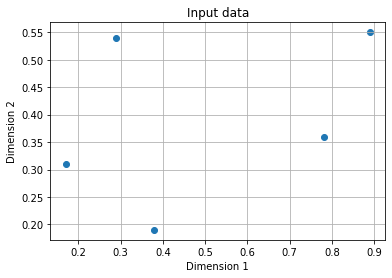

In [48]:
# Plot input data
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')
plt.grid('Training error progress')

plt.show()

In [49]:
# Define minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [50]:
#Number of neurons in the output layer
num_output = labels.shape[1]
num_output

1

In [51]:
#Define a perceptron with 2 input neurons (because we have 2 dimensions in the input data)
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [52]:
# Train the perceptron using the data
error_progress = perceptron.train(data, labels, epochs = 100, show = 20, lr = 0.03)


The goal of learning is reached


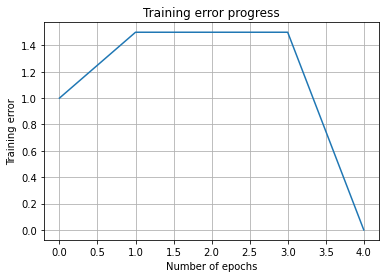

In [53]:
# Plot the trainig progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

# Constructing a single layer neural network

In [54]:
# Load the input data
text = np.loadtxt('./data/data_simple_nn.txt')
text

array([[1. , 4. , 0. , 0. ],
       [1.1, 3.9, 0. , 0. ],
       [1.2, 4.1, 0. , 0. ],
       [0.9, 3.7, 0. , 0. ],
       [7. , 4. , 0. , 1. ],
       [7.2, 4.1, 0. , 1. ],
       [6.9, 3.9, 0. , 1. ],
       [7.1, 4.2, 0. , 1. ],
       [4. , 1. , 1. , 0. ],
       [4.1, 0.9, 1. , 0. ],
       [4.2, 1.1, 1. , 0. ],
       [3.9, 0.8, 1. , 0. ],
       [4. , 7. , 1. , 1. ],
       [4.2, 7.2, 1. , 1. ],
       [3.9, 7.1, 1. , 1. ],
       [4.1, 6.8, 1. , 1. ]])

In [55]:
# Separate it into datapoints and labels
data = text[:, 0:2]
labels = text[:, 2:]

In [56]:
data

array([[1. , 4. ],
       [1.1, 3.9],
       [1.2, 4.1],
       [0.9, 3.7],
       [7. , 4. ],
       [7.2, 4.1],
       [6.9, 3.9],
       [7.1, 4.2],
       [4. , 1. ],
       [4.1, 0.9],
       [4.2, 1.1],
       [3.9, 0.8],
       [4. , 7. ],
       [4.2, 7.2],
       [3.9, 7.1],
       [4.1, 6.8]])

In [57]:
labels

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

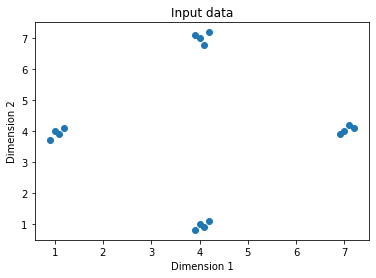

In [58]:
# Plot the input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

plt.show()

In [59]:
# Minimum and maximum values for each dimension
dim1_min, dim1_max= data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

In [60]:
# Define the number of neurons in the output layer
num_output = labels.shape[1]
num_output

2

In [61]:
# Define a single-layer neural network
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [62]:
# Training the neural network with training data
error_progress = nn.train(data, labels, epochs = 100, show = 20, lr = 0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


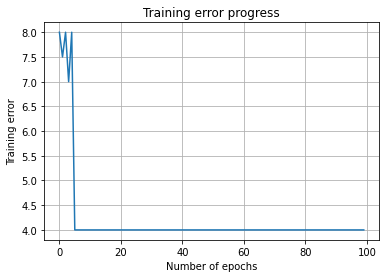

In [63]:
# Plot the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()

plt.show()

In [64]:
# Run the classifier on test datapoints
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
  print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


# Constructing a multilayer neural network

In [65]:
# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [66]:
# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

In [67]:
data

array([[-15.        ],
       [-14.76744186],
       [-14.53488372],
       [-14.30232558],
       [-14.06976744],
       [-13.8372093 ],
       [-13.60465116],
       [-13.37209302],
       [-13.13953488],
       [-12.90697674],
       [-12.6744186 ],
       [-12.44186047],
       [-12.20930233],
       [-11.97674419],
       [-11.74418605],
       [-11.51162791],
       [-11.27906977],
       [-11.04651163],
       [-10.81395349],
       [-10.58139535],
       [-10.34883721],
       [-10.11627907],
       [ -9.88372093],
       [ -9.65116279],
       [ -9.41860465],
       [ -9.18604651],
       [ -8.95348837],
       [ -8.72093023],
       [ -8.48837209],
       [ -8.25581395],
       [ -8.02325581],
       [ -7.79069767],
       [ -7.55813953],
       [ -7.3255814 ],
       [ -7.09302326],
       [ -6.86046512],
       [ -6.62790698],
       [ -6.39534884],
       [ -6.1627907 ],
       [ -5.93023256],
       [ -5.69767442],
       [ -5.46511628],
       [ -5.23255814],
       [ -5

In [68]:
labels

array([[0.19221203],
       [0.18634166],
       [0.18056301],
       [0.17487608],
       [0.16928088],
       [0.1637774 ],
       [0.15836564],
       [0.15304561],
       [0.14781731],
       [0.14268073],
       [0.13763588],
       [0.13268275],
       [0.12782134],
       [0.12305166],
       [0.1183737 ],
       [0.11378747],
       [0.10929296],
       [0.10489018],
       [0.10057912],
       [0.09635979],
       [0.09223218],
       [0.0881963 ],
       [0.08425214],
       [0.0803997 ],
       [0.07663899],
       [0.07297001],
       [0.06939275],
       [0.06590721],
       [0.0625134 ],
       [0.05921131],
       [0.05600095],
       [0.05288231],
       [0.0498554 ],
       [0.04692021],
       [0.04407675],
       [0.04132501],
       [0.03866499],
       [0.0360967 ],
       [0.03362014],
       [0.0312353 ],
       [0.02894218],
       [0.02674079],
       [0.02463112],
       [0.02261318],
       [0.02068696],
       [0.01885247],
       [0.0171097 ],
       [0.015

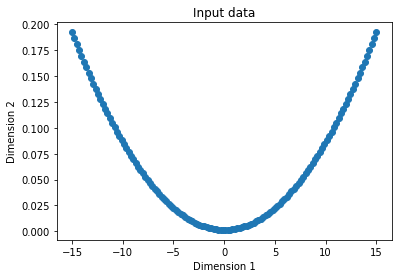

In [69]:
# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

plt.show()

In [70]:
# Define a multilayer neural network with 2 hidden layers
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [71]:
# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [72]:
# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.026054899395772765;
Epoch: 200; Error: 0.13750306742595855;
Epoch: 300; Error: 0.010572101433321952;
The goal of learning is reached


In [73]:
# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

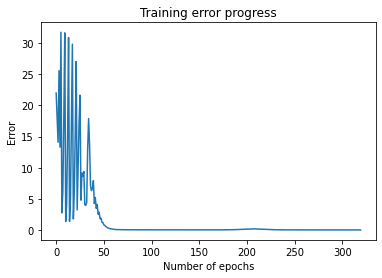

In [74]:
# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

plt.show()

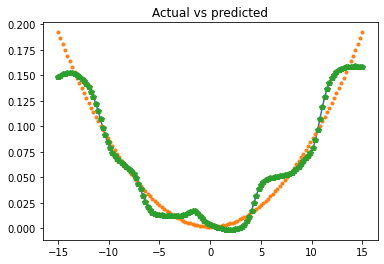

In [75]:
# Plot the predicted output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()

# Building a vector quantizer

In [76]:
# Load input data
text = np.loadtxt('./data/data_vector_quantization.txt')
text.shape

(16, 6)

In [77]:
text

array([[0.9, 5.1, 1. , 0. , 0. , 0. ],
       [1.2, 4.8, 1. , 0. , 0. , 0. ],
       [1. , 4.9, 1. , 0. , 0. , 0. ],
       [0.8, 5.2, 1. , 0. , 0. , 0. ],
       [8. , 4.1, 0. , 1. , 0. , 0. ],
       [8.2, 4.3, 0. , 1. , 0. , 0. ],
       [7.9, 3.8, 0. , 1. , 0. , 0. ],
       [8.3, 4.3, 0. , 1. , 0. , 0. ],
       [5. , 1.1, 0. , 0. , 1. , 0. ],
       [5.1, 0.8, 0. , 0. , 1. , 0. ],
       [5.3, 1.2, 0. , 0. , 1. , 0. ],
       [4.9, 0.9, 0. , 0. , 1. , 0. ],
       [5. , 7. , 0. , 0. , 0. , 1. ],
       [5.2, 7.2, 0. , 0. , 0. , 1. ],
       [4.9, 7.1, 0. , 0. , 0. , 1. ],
       [5.1, 6.8, 0. , 0. , 0. , 1. ]])

In [78]:
# Separate it into data and labels
data = text[:, 0:2]
labels = text[:, 2:]

In [79]:
data

array([[0.9, 5.1],
       [1.2, 4.8],
       [1. , 4.9],
       [0.8, 5.2],
       [8. , 4.1],
       [8.2, 4.3],
       [7.9, 3.8],
       [8.3, 4.3],
       [5. , 1.1],
       [5.1, 0.8],
       [5.3, 1.2],
       [4.9, 0.9],
       [5. , 7. ],
       [5.2, 7.2],
       [4.9, 7.1],
       [5.1, 6.8]])

In [80]:
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [81]:
import neurolab as nl

In [82]:
# Define a neural network with 2 layers:
# 10 neurons in input layer and 4 neurons in output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

In [83]:
# Train the neural network
_ = nn.train(data, labels, epochs=500, goal=-1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [84]:
# Create the input grid to visualize the output clusters
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

In [85]:
# Evaluate the input grid of points
grid_eval = nn.sim(grid_xy)

In [86]:
# Define the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

In [87]:
# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

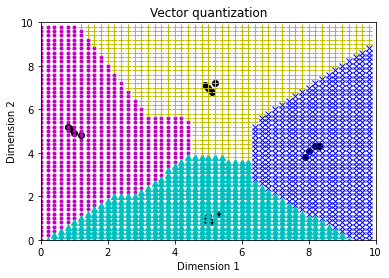

In [88]:
# Plot the outputs
plt.plot(class_1[:,0], class_1[:,1], 'ko',
         class_2[:,0], class_2[:,1], 'ko',
         class_3[:,0], class_3[:,1], 'ko',
         class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
         grid_2[:,0], grid_2[:,1], 'bx',
         grid_3[:,0], grid_3[:,1], 'c^',
         grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')

plt.show()

# Analyzing sequential data using recurrent neural networks

Define a function to generate the waveforms. Start by defining four sine waves:

In [96]:
def get_data(num_points):
  # Create sine waveform
  wave_1 = 0.5 * np.sin(np.arange(0, num_points))
  wave_2 = 3.6 * np.sin(np.arange(0, num_points))
  wave_3 = 1.1 * np.sin(np.arange(0, num_points))
  wave_4 = 4.7 * np.sin(np.arange(0, num_points))
  
  # Create varying amplitudes
  amp_1 = np.ones(num_points)
  amp_2 = 2.1 + np.zeros(num_points)
  amp_3 = 3.2 * np.ones(num_points)
  amp_4 = 0.8 + np.zeros(num_points)

  # Create the overall waveform:
  wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points * 4, 1)
  amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4, 1)
  return wave, amp

Define a function to visualize the output of the neural network

In [105]:
# Visaulize the output
def visualize_output(nn, num_points_test):
  wave, amp = get_data(num_points_test)
  output = nn.sim(wave)
  plt.plot(amp.reshape(num_points_test * 4))
  plt.plot(output.reshape(num_points_test * 4))

Define the main function and creating a waveform

In [106]:
if __name__ == '__main__':
  # Create some sample data
  num_points = 40
  wave, amp = get_data(num_points)

Create a recurrent neural network with two layers:

In [107]:
# Create a recurrent neural network with 2 layers
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

Set the initializer functions for each layer:


In [108]:
# Set the init functions for each layer
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

Train the neural network:

In [109]:
# Train the recurrent neural network
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

Epoch: 100; Error: 0.7507889528483807;
Epoch: 200; Error: 0.2598911926765113;
Epoch: 300; Error: 0.061685663902978784;
Epoch: 400; Error: 0.04898127726938981;
Epoch: 500; Error: 0.04786184727616918;
Epoch: 600; Error: 0.046202849502501885;
Epoch: 700; Error: 0.04559931103950552;
Epoch: 800; Error: 0.04306735533512247;
Epoch: 900; Error: 0.04837010239522242;
Epoch: 1000; Error: 0.04338222640044911;
Epoch: 1100; Error: 0.04039294242337767;
Epoch: 1200; Error: 0.04308247464133082;
The maximum number of train epochs is reached


In [110]:
# Run the training data through the network
output = nn.sim(wave)

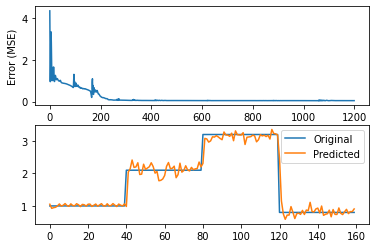

In [111]:
# Plot the results
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')

plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])

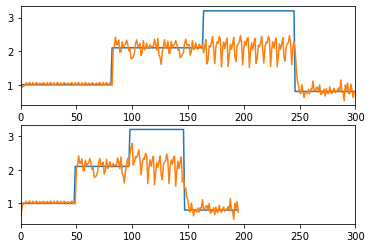

In [112]:
# Testing the network performance on unknown data
plt.figure()

plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])

plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])

plt.show()

# Visualizing characters in an Optical Character Recognition database

In [113]:
import os
import sys

import cv2
import numpy as np

In [114]:
# Define the input file containig the OCR data
input_file = './data/letter.data'

In [115]:
# Define the visualization parameters 
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

In [118]:
# Iterate until the user presses the Esc key
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Read the data
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])

        # Reshape the data into a 2D image
        img = np.reshape(data, (height, width))

        # Scale the image
        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)

        # Display the image
        # cv2.imshow('Image', img_scaled)

        # Check if the user pressed the Esc key
        # c = cv2.waitKey()
        # if c == 27:
        #     break
        
        break   
# cv2.destroyAllWindows()

# Building an Optical Character Recognition engine

In [119]:
# Define the input file
input_file = './data/letter.data'

In [120]:
# Define the number of datapoints to be loaded from the input file
num_datapoints = 50

In [121]:
# String containing all the distinct characters
orig_labels = 'omandig'

In [122]:
# Compute the number of distinct characters
num_orig_labels = len(orig_labels)

In [123]:
# Define the training and testing parameters
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

In [124]:
# Define the dataset extraction parameters
start = 6
end = -1

In [127]:
# Creating the dataset
data = []
labels = []
with open(input_file, 'r') as f:
  for line in f.readlines():
    # Split the current line tabwise
    list_vals = line.split('\t')
    # Check if the label is in our ground truth labels. If not, we should skip it.
    if list_vals[1] not in orig_labels:
      continue
    # Extract the current label and append it to the main list
    label = np.zeros((num_orig_labels, 1))
    label[orig_labels.index(list_vals[1])] = 1
    labels.append(label)
    # Extract the character vector and append it to the main list
    cur_char = np.array([float(x) for x in list_vals[start:end]])
    data.append(cur_char)
    # Exit the loop once the required datset has been created
    if len(data) >= num_datapoints:
      break

In [128]:
# Convert the data and labels into numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

In [129]:
# Extract the number of dimensions
num_dims = len(data[0])

In [130]:
# Create a feedforward neural network
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], [128, 16, num_orig_labels])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [131]:
# Train the neural network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], epochs=10000, show=100, goal=0.01)

Epoch: 100; Error: 50.12605849822061;
Epoch: 200; Error: 41.54823775003852;
Epoch: 300; Error: 28.385145870501695;
Epoch: 400; Error: 21.91046844114794;
Epoch: 500; Error: 22.810208811379262;
Epoch: 600; Error: 11.439283030647637;
Epoch: 700; Error: 10.487995979906188;
Epoch: 800; Error: 10.579431515241758;
Epoch: 900; Error: 9.238159566144795;
Epoch: 1000; Error: 8.618724514055438;
Epoch: 1100; Error: 8.29293325757913;
Epoch: 1200; Error: 7.954636154611357;
Epoch: 1300; Error: 7.568039446087846;
Epoch: 1400; Error: 8.813517265280744;
Epoch: 1500; Error: 8.068066946044517;
Epoch: 1600; Error: 7.381555141678705;
Epoch: 1700; Error: 6.486682513280292;
Epoch: 1800; Error: 4.615003467686971;
Epoch: 1900; Error: 3.2522614459734323;
Epoch: 2000; Error: 3.119857906340285;
Epoch: 2100; Error: 2.927113582614919;
Epoch: 2200; Error: 2.6367152521899944;
Epoch: 2300; Error: 3.1017522582571466;
Epoch: 2400; Error: 2.5276471667937566;
Epoch: 2500; Error: 2.9649531437691614;
Epoch: 2600; Error: 1.075

In [132]:
# Predict the output for test inputs
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
  print('\nOriginal:', orig_labels[np.argmax(labels[i])])
  print('Predicted:', orig_labels[np.argmax(predicted_test[i])])


Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: n

Original: m
Predicted: m

Original: a
Predicted: o

Original: n
Predicted: n


# Recurrent Neural Network

## Long Short-Term Memory (LSTM)

In [134]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [135]:
max_features = 20000
maxlen = 80 # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [139]:
# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [140]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [141]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train,maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape:  (25000, 80)


In [143]:
# Model configuration
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2)) # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

#try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [145]:
model.fit(X_train, y_train, batch_size=batch_size, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 126s 159ms/step - loss: 0.4966 - accuracy: 0.7461 - val_loss: 0.3537 - val_accuracy: 0.8433
Epoch 2/5
782/782 [==============================] - 124s 158ms/step - loss: 0.2429 - accuracy: 0.9045 - val_loss: 0.3684 - val_accuracy: 0.8390
Epoch 3/5
782/782 [==============================] - 123s 158ms/step - loss: 0.1491 - accuracy: 0.9453 - val_loss: 0.5307 - val_accuracy: 0.8260
Epoch 4/5
782/782 [==============================] - 124s 158ms/step - loss: 0.0908 - accuracy: 0.9677 - val_loss: 0.5513 - val_accuracy: 0.8262
Epoch 5/5
782/782 [==============================] - 124s 158ms/step - loss: 0.0662 - accuracy: 0.9781 - val_loss: 0.6071 - val_accuracy: 0.8204


In [146]:
# Evaluate
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)

print('Train score: ', train_score)
print('Train accuracy: ', train_acc)

print('Test score: ', test_score)
print('Test accuracy: ', test_acc)

782/782 [==============================] - 22s 29ms/step - loss: 0.6071 - accuracy: 0.8204
Train score:  0.035420358180999756
Train accuracy:  0.9911999702453613
Test score:  0.6070968508720398
Test accuracy:  0.820360004901886


# Transfer Learning

In [147]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [148]:
batch_size = 128
nb_classes = 5
nb_epoch = 5

In [149]:
# input image dimensions
img_rows, img_cols = 28, 28

In [150]:
# number of convolutional filters to use
nb_filters = 32

In [151]:
# size of pooling area for max pooling
pool_size = 2

In [152]:
# convolution kernel size
kernel_size = 3

In [153]:
input_shape = (img_rows, img_cols, 1)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [154]:
# create two datasets one with digits below 5 and one with 5 and above
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

In [155]:
X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5 #make classes start at 0 for
X_test_gte5 = X_test[y_test >= 5] #np_utils.to categorical
y_test_gte5 = y_test[y_test >= 5] - 5

In [170]:
# Train model for digits 0 to 4
def train_model(model, train, test, nb_classes):
  X_train = train[0].reshape((train[0].shape[0], ) + input_shape)
  X_test = test[0].reshape((test[0].shape[0], ) + input_shape)
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_train /= 255
  X_test /= 255
  print('X_train shape:', X_train.shape)
  print(X_train.shape[0], 'train samples')
  print(X_test.shape[0], 'test samples')

  #convert class vectors to binary class matrices
  Y_train = np_utils.to_categorical(train[1], nb_classes)
  Y_test = np_utils.to_categorical(test[1], nb_classes)

  model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

  model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
  score = model.evaluate(X_test, Y_test, verbose=0)
  print('Test score: ', score[0])
  print('Test accuracy', score[1])

In [176]:
# define two groups of layers: feature(convolutions) and classification(dense)
feature_layers = [
                  Convolution2D(nb_filters, kernel_size,
                                input_shape=input_shape),
                  Activation('relu'),
                  Convolution2D(nb_filters, kernel_size),
                  Activation('relu'),
                  MaxPooling2D(pool_size=(pool_size, pool_size)),
                  Dropout(0.25),
                  Flatten(),
]
classification_layers = [
                         Dense(128),
                         Activation('relu'),
                         Dropout(0.5),
                         Dense(nb_classes),
                         Activation('softmax')
]


In [177]:
# create complete model
model = Sequential(feature_layers + classification_layers)

In [178]:
# train model for 5-digit classification[0..4]
train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5), nb_classes)


X_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 [==============================] - 49s 201ms/step - loss: 1.6020 - accuracy: 0.2572 - val_loss: 1.5667 - val_accuracy: 0.4637
Epoch 2/5
240/240 [==============================] - 48s 199ms/step - loss: 1.5655 - accuracy: 0.3539 - val_loss: 1.5260 - val_accuracy: 0.7031
Epoch 3/5
240/240 [==============================] - 48s 198ms/step - loss: 1.5266 - accuracy: 0.4563 - val_loss: 1.4800 - val_accuracy: 0.8074
Epoch 4/5
240/240 [==============================] - 48s 199ms/step - loss: 1.4810 - accuracy: 0.5471 - val_loss: 1.4258 - val_accuracy: 0.8523
Epoch 5/5
240/240 [==============================] - 48s 201ms/step - loss: 1.4306 - accuracy: 0.6143 - val_loss: 1.3611 - val_accuracy: 0.8801
Test score:  1.361143946647644
Test accuracy 0.8801323175430298


Transfer existing trained model on 0 to 4 to build model for digits 5 to 9

In [179]:
# freeze feature layers and rebuild model
for layer in feature_layers:
  layer.trainable = False

In [180]:
# transfer: train dense layers for new classification task [5..9]
train_model(model, (X_train_gte5, y_train_gte5), (X_test_gte5, y_test_gte5), nb_classes)

X_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5
230/230 [==============================] - 15s 66ms/step - loss: 1.5920 - accuracy: 0.2592 - val_loss: 1.5567 - val_accuracy: 0.3974
Epoch 2/5
230/230 [==============================] - 15s 64ms/step - loss: 1.5579 - accuracy: 0.3146 - val_loss: 1.5199 - val_accuracy: 0.4752
Epoch 3/5
230/230 [==============================] - 15s 64ms/step - loss: 1.5238 - accuracy: 0.3744 - val_loss: 1.4834 - val_accuracy: 0.5472
Epoch 4/5
230/230 [==============================] - 15s 65ms/step - loss: 1.4885 - accuracy: 0.4290 - val_loss: 1.4471 - val_accuracy: 0.6073
Epoch 5/5
230/230 [==============================] - 15s 65ms/step - loss: 1.4571 - accuracy: 0.4751 - val_loss: 1.4107 - val_accuracy: 0.6634
Test score:  1.4106525182724
Test accuracy 0.6634437441825867
